# Working with Missing Data


![accident](http://sf.streetsblog.org/wp-content/uploads/sites/3/2013/08/IIHS-crash-photo1.jpg)

* * *
<br>

Data can be missing for a variety of reasons, so how to **handle missing data without having to drop rows and columns** is a must.

Using data on motor vehicle collisions released by New York City and published on the [kNYC OpenData website](https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95)  will be what we are going to work with.

We'll work with an extract of the full data: 

 Crashes from the year 2018. 

[download data here](https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95)

Our data set is in a CSV called `nypd_mvc_2018.csv`. 

### Data dictionary


`unique_key`: A unique identifier for each collision.

`date, time`: Date and time of the collision.

`borough`: The borough, or area of New York City, where the collision occurred.

`location`: Latitude and longitude coordinates for the collision.

`on_street, cross_street, off_street`: Details of the street or intersection where the collision occurred.

`pedestrians_injured`: Number of pedestrians who were injured.

`cyclist_injured`: Number of people traveling on a bicycle who were injured.

`motorist_injured`: Number of people traveling in a vehicle who were injured.

`total_injured`: Total number of people injured.

`pedestrians_killed`: Number of pedestrians who were killed.

`cyclist_killed`: Number of people traveling on a bicycle who were killed.

`motorist_killed`: Number of people traveling in a vehicle who were killed.

`total_killed`: Total number of people killed.

`vehicle_1 through vehicle_5`: Type of each vehicle involved in the accident.

`cause_vehicle_1 through cause_vehicle_5`: Contributing factor for each vehicle in the accident.



In [1]:
import pandas as pd
import numpy as np

pd.set_option("display.max_columns", None)
mvc = pd.read_csv("csv/nypd_mvc_2018.csv")

mvc.head(3)

,unique_key,date,time,borough,location,on_street,cross_street,off_street,pedestrians_injured,cyclist_injured,motorist_injured,total_injured,pedestrians_killed,cyclist_killed,motorist_killed,total_killed,vehicle_1,vehicle_2,vehicle_3,vehicle_4,vehicle_5,cause_vehicle_1,cause_vehicle_2,cause_vehicle_3,cause_vehicle_4,cause_vehicle_5
0,3869058,2018-03-23,21:40,MANHATTAN,"(40.742832, -74.00771)",WEST 15 STREET,10 AVENUE,NaN,0,0,0,0.0,0,0,0,0.0,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,Following Too Closely,Unspecified,NaN,NaN,NaN
1,3847947,2018-02-13,14:45,BROOKLYN,"(40.623714, -73.99314)",16 AVENUE,62 STREET,NaN,0,0,0,0.0,0,0,0,0.0,SPORT UTILITY / STATION WAGON,DS,NaN,NaN,NaN,Backing Unsafely,Unspecified,NaN,NaN,NaN
2,3914294,2018-06-04,0:00,NaN,"(40.591755, -73.9083)",BELT PARKWAY,NaN,NaN,0,0,1,1.0,0,0,0,0.0,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,Following Too Closely,Unspecified,NaN,NaN,NaN


In [2]:
mvc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57864 entries, 0 to 57863
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   unique_key           57864 non-null  int64  
 1   date                 57864 non-null  object 
 2   time                 57864 non-null  object 
 3   borough              37218 non-null  object 
 4   location             53979 non-null  object 
 5   on_street            43903 non-null  object 
 6   cross_street         28615 non-null  object 
 7   off_street           13771 non-null  object 
 8   pedestrians_injured  57864 non-null  int64  
 9   cyclist_injured      57864 non-null  int64  
 10  motorist_injured     57864 non-null  int64  
 11  total_injured        57863 non-null  float64
 12  pedestrians_killed   57864 non-null  int64  
 13  cyclist_killed       57864 non-null  int64  
 14  motorist_killed      57864 non-null  int64  
 15  total_killed         57859 non-null 

#### Verifying the percentage of null values

To give us a better picture of the null values in the data, let's calculate the percentage of null values in each column. 

Below, we divide the number of null values in each column by the total number of values in the data set:

In [3]:
null_counts = mvc.isnull().sum()
null_counts

unique_key                 0
date                       0
time                       0
borough                20646
location                3885
on_street              13961
cross_street           29249
off_street             44093
pedestrians_injured        0
cyclist_injured            0
motorist_injured           0
total_injured              1
pedestrians_killed         0
cyclist_killed             0
motorist_killed            0
total_killed               5
vehicle_1                355
vehicle_2              12262
vehicle_3              54352
vehicle_4              57158
vehicle_5              57681
cause_vehicle_1          175
cause_vehicle_2         8692
cause_vehicle_3        54134
cause_vehicle_4        57111
cause_vehicle_5        57671
dtype: int64

In [4]:
# percentage of Nulls values
null_counts_pct = null_counts / mvc.shape[0] * 100
null_counts_pct

unique_key              0.000000
date                    0.000000
time                    0.000000
borough                35.680216
location                6.714019
on_street              24.127264
cross_street           50.547836
off_street             76.201092
pedestrians_injured     0.000000
cyclist_injured         0.000000
motorist_injured        0.000000
total_injured           0.001728
pedestrians_killed      0.000000
cyclist_killed          0.000000
motorist_killed         0.000000
total_killed            0.008641
vehicle_1               0.613508
vehicle_2              21.191069
vehicle_3              93.930596
vehicle_4              98.779898
vehicle_5              99.683741
cause_vehicle_1         0.302433
cause_vehicle_2        15.021430
cause_vehicle_3        93.553850
cause_vehicle_4        98.698673
cause_vehicle_5        99.666459
dtype: float64

#### interpreting data.

It is very important to know how to interpret the information we have about our data, it depends on whether we take the right steps or not.

The sum of `total_killed` and `total_injured` has an amount that should not be because the sums are 0!

    ...
    pedestrians_killed      0.000000    .
    cyclist_killed          0.000000    +
    motorist_killed         0.000000    +
    total_killed            0.008641 <- ¿!?
    pedestrians_injured     0.000000    .
    cyclist_injured         0.000000    +
    motorist_injured        0.000000    +
    total_injured           0.001728 <- ¿!?
    ...

We'll then add both, the counts and percentages to a dataframe to make them easier to compare and Transpose the output:

In [5]:
# null_counts     | data values
# null_counts_pct | data percentages

null_df = pd.DataFrame({'null_counts': null_counts, 'null_pct %': null_counts_pct})
# Rotate the dataframe so that rows become columns and vice-versa

null_df = null_df.T.astype(int)
null_df

,unique_key,date,time,borough,location,on_street,cross_street,off_street,pedestrians_injured,cyclist_injured,motorist_injured,total_injured,pedestrians_killed,cyclist_killed,motorist_killed,total_killed,vehicle_1,vehicle_2,vehicle_3,vehicle_4,vehicle_5,cause_vehicle_1,cause_vehicle_2,cause_vehicle_3,cause_vehicle_4,cause_vehicle_5
null_counts,0,0,0,20646,3885,13961,29249,44093,0,0,0,1,0,0,0,5,355,12262,54352,57158,57681,175,8692,54134,57111,57671
null_pct %,0,0,0,35,6,24,50,76,0,0,0,0,0,0,0,0,0,21,93,98,99,0,15,93,98,99


In [6]:
null_df.sum().loc[lambda x : x==0]

unique_key             0
date                   0
time                   0
pedestrians_injured    0
cyclist_injured        0
motorist_injured       0
pedestrians_killed     0
cyclist_killed         0
motorist_killed        0
dtype: int64

In [7]:
len_zeronull_df = len(null_df.sum().loc[lambda x : x==0]) # amount of columns without null values.
len_null_df = len(null_df) # numbers of total columns on dataframe

In [8]:
(len_null_df / len_zeronull_df)*100

22.22222222222222

About a 22% of the columns have no null values, ranging from less than 1% to 99%!

### Looking at the group of columns that relate to people killed in collisions.

In [9]:
killed_cols = [col for col in mvc.columns if 'killed' in col]
killed_cols

['pedestrians_killed', 'cyclist_killed', 'motorist_killed', 'total_killed']

In [10]:
null_df[killed_cols]

,pedestrians_killed,cyclist_killed,motorist_killed,total_killed
null_counts,0,0,0,5
null_pct %,0,0,0,0


**The total number of people killed should be the sum of each of the individual categories**. 

But each of the individual categories have no missing values, the `total_killed` column **has five missing values** ¿!!!?.

We might be able to **imputate** the missing values with the sums of the individual columns for that row. 

### How to do it?

Selecting the first three columns `pedestrians_killed`, `cyclist_killed`, `motorist_killed`, and sum each row in a variable called `killed_manual_sum`.

Once is done compare the manual sum ie. `killed_manual_sum` to the original column `total_killed` and with this comparation create a boolean mask where equivalent values are not equal.

Lastly, using the boolean mask to filter the original dataframe **to include only rows** where the manual sum and original **aren't equal**.

* * *

- Selecting the columns with `killed` inside of it.

In [11]:
killed_cols

['pedestrians_killed', 'cyclist_killed', 'motorist_killed', 'total_killed']

- Create a copy for work on it

In [12]:
killed = mvc[killed_cols].copy()
killed.head() # a sample of content

,pedestrians_killed,cyclist_killed,motorist_killed,total_killed
0,0,0,0,0.0
1,0,0,0,0.0
2,0,0,0,0.0
3,0,0,0,0.0
4,0,0,0,0.0


- Select the columns from `killed`

In [13]:
killed.iloc[:,:3].head() # a sample of content too

,pedestrians_killed,cyclist_killed,motorist_killed
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


- sum each row creating `killed_manual_sum`

In [14]:
killed_manual_sum = killed.iloc[:,:3].sum(axis = 1)
killed_manual_sum.head()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [15]:
killed_manual_sum.value_counts()

0    57814
1       50
dtype: int64

### Comparison between `killed_manual_sum` and the `total_killed` in the dataframe.

Before doing anything I would like to know what is the sum total of the column `total_killed`

In [16]:
tk = killed.iloc[:,3:].sum(axis = 1)
tk.value_counts()

0.0    57815
1.0       49
dtype: int64

### Creating a boolean mask 

Checks whether each value in `killed_manual_sum` **is not equal** to the values in the `total_killed` column.

In [17]:
killed_mask = killed_manual_sum != killed['total_killed']
killed_mask.head() # boolean mask resulting of difference results.

0    False
1    False
2    False
3    False
4    False
dtype: bool

Using `killed_mask` to filter the rows in `killed`.

In [18]:
killed_non_eq = killed[killed_mask]
killed_non_eq

,pedestrians_killed,cyclist_killed,motorist_killed,total_killed
3508,0,0,0,NaN
20163,0,0,0,NaN
22046,0,0,1,0.0
48719,0,0,0,NaN
55148,0,0,0,NaN
55699,0,0,0,NaN


### Sumarizing strategy: Filling and verifying the `Killed` data.

<br>

We can categorize these results into two categories:

- 1. **Five rows** where the `total_killed` **is not equal to the sum of the other columns** because the total value is missing `NaN`.


- 2. **One row** where the `total_killed` **is less than the sum of the other columns**.


<br>

- As a conclusion, refill **null values** with the sum of the columns is a fairly good choice for **imputation**.


- A suspicious row data one that doesn't sum correctly, we'll mark this suspect row by setting its value to `NaN`.


<br>


`Series.mask()` replace the values where the condition is `True. technique to update the values in the `total_killed` column.

        Series.mask(bool_mask, val_to_replace)

In [19]:
killed_null = killed['total_killed'].isnull()
killed_null.head()

0    False
1    False
2    False
3    False
4    False
Name: total_killed, dtype: bool

In [20]:
# killed_null       -> content: boolean values
# killed_manual_sum -> the three columns that we had chosen for the sum, the content: is int (0,1)

killed['total_killed'] = killed['total_killed'].mask(killed_null, killed_manual_sum)
killed['total_killed'].unique() # output 0 and 1

array([0., 1.])

Replacing values where the manual sum `killed_manual_sum` and the `total_killed `column aren't equal with `np.nan`.

We can define the boolean series directly into `Series.mask()`:

In [21]:
# fix the killed values

killed['total_killed'] = killed['total_killed'].mask(killed['total_killed'] != killed_manual_sum, np.nan)
killed['total_killed'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: total_killed, dtype: float64

In [22]:
killed[killed_mask]

,pedestrians_killed,cyclist_killed,motorist_killed,total_killed
3508,0,0,0,0.0
20163,0,0,0,0.0
22046,0,0,1,NaN
48719,0,0,0,0.0
55148,0,0,0,0.0
55699,0,0,0,0.0


### Let's do the same for the `injured` data.


We included the code to clean the `killed` columns. In addition, we've created an `injured` dataframe with just the injured columns and `injured_manual_sum`, a series manually summing the three individual injured columns.

- 1. Use `Series.mask()` to replace any null values from the `total_injured` column with their equivalents from the `injured_manual_sum` series.


- 2. Use `Series.mask()` to replace any numbers from `total_injured` that aren't equal to their equivalents in `injured_manual_sum` with `np.nan`.

In [23]:
# Create an injured dataframe and manually sum values

injured = mvc[[col for col in mvc.columns if 'injured' in col]].copy()
injured.head()

,pedestrians_injured,cyclist_injured,motorist_injured,total_injured
0,0,0,0,0.0
1,0,0,0,0.0
2,0,0,1,1.0
3,0,0,0,0.0
4,0,0,0,0.0


In [24]:
%%html
<style>
table {float:left}
</style>




we will the add the contents of the three rows in a single column called `injured_manual_sum`

***

the example of operation is as follows:

`df = pd.DataFrame({'A':[1,2,3],'B':[3,2,1],'C':[5,5,5]})`

`df`

|||||
|:-|:-|:-|:-|
|  |A | B | C|
|0 | 1|  3| 5|
|1 | 2|  2 | 5|
|2 | 3|  1 | 5 |


`df.iloc[:,:2]`

||||
|:-|:-|:-|
|  |A | B |
|0 | 1|  3|
|1 | 2|  2 |
|2 | 3|  1 |




`result = df.iloc[:,:2].sum(axis=1)`

|||
|:-|:-|
| | A | 
|0  |  4|
|1  |  4|
|2   | 4|

- This is the end result

***

#### Come back to the problem.

In [25]:
injured_manual_sum = injured.iloc[:,:3].sum(axis=1)
injured_manual_sum.head() 

0    0
1    0
2    1
3    0
4    0
dtype: int64

The next step is how to identify the **null values** for manage them. 

The procedure will be done using the `isnull()` method in this way it will return a `True` when it detects a null **null values** .

- If there are we will have a `True`

In [26]:
injured_null = injured['total_injured'].isnull()
injured_null.head()

0    False
1    False
2    False
3    False
4    False
Name: total_injured, dtype: bool

- values that are `NaN` are replaced by the result of the manual addition of the start.

In [27]:
injured['total_injured'] = injured['total_injured'].mask(injured_null,injured_manual_sum)
injured['total_injured'].head()

0    0.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: total_injured, dtype: float64

- if the result we get is different from the one we had with the manual sum then fill in the values that give True with NaN

In [28]:
injured['total_injured'] = injured['total_injured'].mask(injured['total_injured'] != injured_manual_sum, np.nan)

In [29]:
injured.head(10)

,pedestrians_injured,cyclist_injured,motorist_injured,total_injured
0,0,0,0,0.0
1,0,0,0,0.0
2,0,0,1,1.0
3,0,0,0,0.0
4,0,0,0,0.0
5,0,0,0,0.0
6,0,0,0,0.0
7,0,0,0,0.0
8,0,0,3,3.0
9,0,0,0,0.0


### Back to the main Dataframe

In [30]:
summary = {
    'injured': [
        mvc['total_injured'].isnull().sum(),
        injured['total_injured'].isnull().sum()
    ],
    'killed': [
        mvc['total_killed'].isnull().sum(),
        killed['total_killed'].isnull().sum()
    ]
}
print(pd.DataFrame(summary, index=['before','after']))

        injured  killed
before        1       5
after        21       1


- For the `total_killed` column, the number of values has gone down from 5 to 1. 


- For the `total_injured` column, the number of values has actually gone up — from 1 to 21. 

<br>


What we've actually done is fill all the **null** values and identify values that have suspect data. 


This will make any analysis we do on this data more accurate in the long run.

* * *

Assigning the `total_killed` and `total_injured` column from the `injured` and `killed` dataframe to the same column in the `mvc` dataframe.

In [31]:
mvc['total_killed'] = killed['total_killed']
#mvc['total_injured']

Assigning the `total_killed` column from the `killed` dataframe to the same column in the `mvc` dataframe.

In [32]:
mvc['total_injured'] = injured['total_injured']
#mvc['total_killed']

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

### Visualizing Missing Data with Plots

We used a table of numbers to understand the number of missing values in our dataframe. A different approach we can take is to use a plot to visualize the missing values. The function below uses `seaborn.heatmap()` to represent null values as light squares and non-null values as dark squares:

In [34]:
def plot_null_matrix(df, figsize=(18,15)):
    # initiate the figure
    plt.figure(figsize=figsize)
    # create a boolean dataframe based on whether values are null
    df_null = df.isnull()
    # create a heatmap of the boolean dataframe
    sns.heatmap(~df_null, cbar=False, yticklabels=False) # 
    plt.xticks(rotation=90, size='x-large')
    plt.show()

Let's look at how the function works by using it to plot just the first row of our `mvc` dataframe. We'll display the first row as a table immediately below so it's easy to compare:

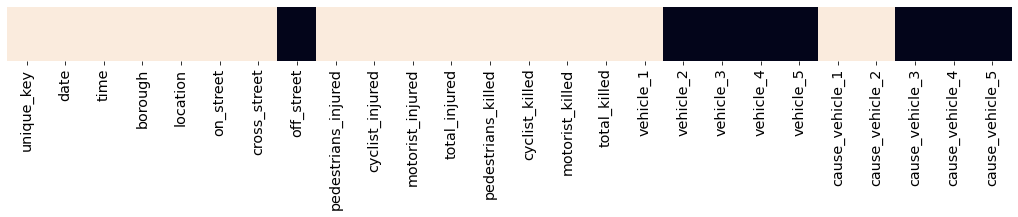

In [35]:
plot_null_matrix(mvc.head(1), figsize=(18,1))

In [36]:
mvc.head(1)

,unique_key,date,time,borough,location,on_street,cross_street,off_street,pedestrians_injured,cyclist_injured,motorist_injured,total_injured,pedestrians_killed,cyclist_killed,motorist_killed,total_killed,vehicle_1,vehicle_2,vehicle_3,vehicle_4,vehicle_5,cause_vehicle_1,cause_vehicle_2,cause_vehicle_3,cause_vehicle_4,cause_vehicle_5
0,3869058,2018-03-23,21:40,MANHATTAN,"(40.742832, -74.00771)",WEST 15 STREET,10 AVENUE,NaN,0,0,0,0.0,0,0,0,0.0,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,Following Too Closely,Unspecified,NaN,NaN,NaN


Each value is represented by a dark square, and each missing value is represented by a light square.

Let's look at what a plot matrix looks like for the whole dataframe:

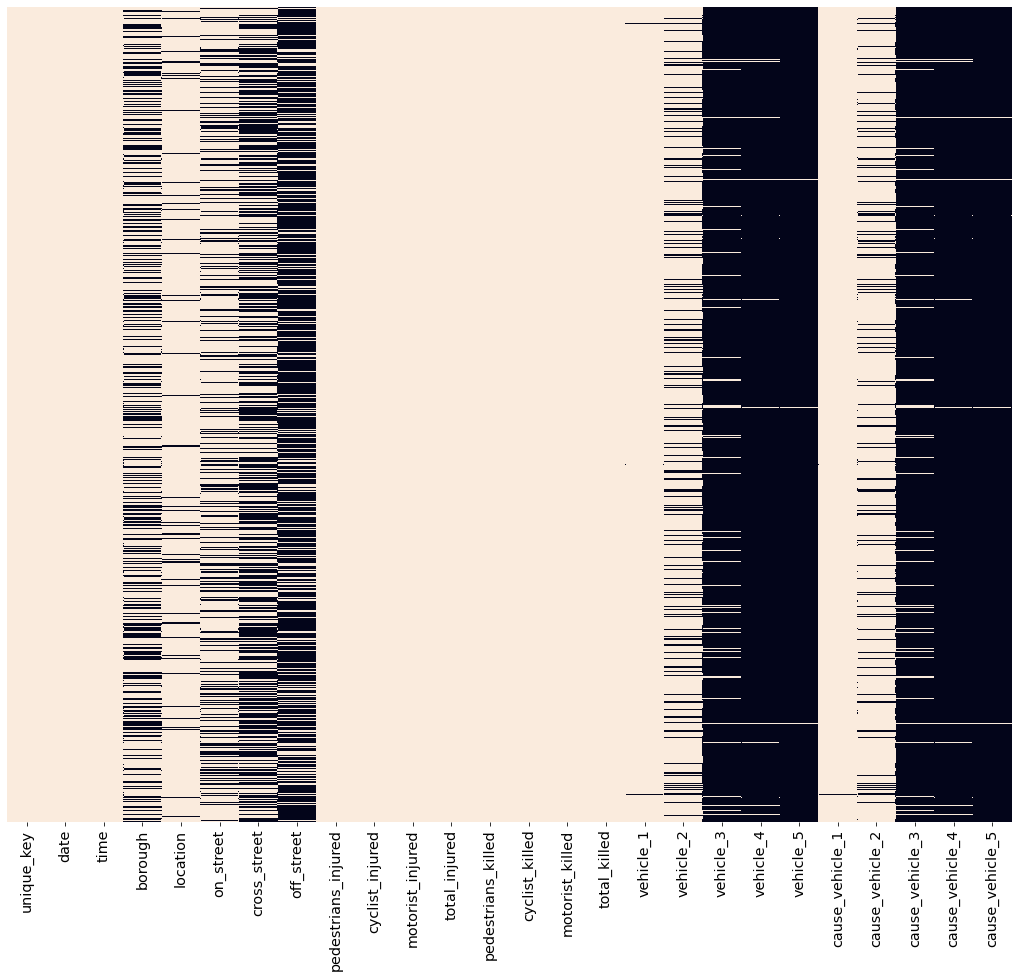

In [37]:
plot_null_matrix(mvc)

We can make some immediate interpretations about our dataframe:

- The first three columns have few to no missing values.

- The next five columns have missing values scattered throughout, with each column seeming to have its own density of missing values.

- The next eight columns are the `injury` and `killed` columns we just cleaned, and only have a few missing values.

- The last 10 columns seem to break into two groups of five, with each group of five having similar patterns of null/non-null values.

Let's examine the pattern in the last 10 columns a little more closely calculating the **correlation** between two columns. 

`dataframe.corr()`

- I create a Boolean filter.

- with the condition that if the sum of null values is greater than 0.

- apply that filter to `mvc` and get the correlation between null values.

In [38]:
cols_with_missing_vals = mvc.columns[mvc.isnull().sum() > 0] # boolean filter; columns with number>0 of NaN`s
missing_corr = mvc[cols_with_missing_vals].isnull().corr() # relation between columns bolean filtered
missing_corr

,borough,location,on_street,cross_street,off_street,total_injured,total_killed,vehicle_1,vehicle_2,vehicle_3,vehicle_4,vehicle_5,cause_vehicle_1,cause_vehicle_2,cause_vehicle_3,cause_vehicle_4,cause_vehicle_5
borough,1.000000,0.190105,-0.350190,0.409107,0.362189,-0.002827,0.005582,-0.018325,-0.077516,-0.061932,-0.020406,-0.010733,-0.012115,-0.058596,-0.060542,-0.020158,-0.011348
location,0.190105,1.000000,-0.073975,-0.069719,0.084579,-0.001486,0.015496,-0.010466,-0.033842,-0.000927,0.004655,-0.005797,-0.003458,-0.021373,0.000684,0.004604,-0.004841
on_street,-0.350190,-0.073975,1.000000,0.557767,-0.991030,0.006220,-0.002344,-0.001889,0.119647,0.020867,0.004172,-0.002768,0.001307,0.087374,0.017426,0.002737,-0.003107
cross_street,0.409107,-0.069719,0.557767,1.000000,-0.552763,0.002513,0.004112,-0.017018,0.043799,-0.049910,-0.021137,-0.012003,-0.009102,0.031189,-0.052159,-0.022074,-0.013455
off_street,0.362189,0.084579,-0.991030,-0.552763,1.000000,-0.004266,0.002323,0.001812,-0.121129,-0.022404,-0.004074,0.002492,-0.001738,-0.088187,-0.019120,-0.002580,0.002863
total_injured,-0.002827,-0.001486,0.006220,0.002513,-0.004266,1.000000,-0.000079,0.079840,0.025644,-0.002757,0.002118,0.001073,0.131140,0.030082,-0.002388,0.002188,0.001102
total_killed,0.005582,0.015496,-0.002344,0.004112,0.002323,-0.000079,1.000000,-0.000327,0.008017,0.001057,0.000462,0.000234,-0.000229,0.009888,0.001091,0.000477,0.000240
vehicle_1,-0.018325,-0.010466,-0.001889,-0.017018,0.001812,0.079840,-0.000327,1.000000,0.151516,0.019972,0.008732,0.004425,0.604281,0.180678,0.020624,0.009022,0.004545
vehicle_2,-0.077516,-0.033842,0.119647,0.043799,-0.121129,0.025644,0.008017,0.151516,1.000000,0.131813,0.057631,0.029208,0.106214,0.784402,0.132499,0.058050,0.029264
vehicle_3,-0.061932,-0.000927,0.020867,-0.049910,-0.022404,-0.002757,0.001057,0.019972,0.131813,1.000000,0.437214,0.221585,0.014000,0.106874,0.961316,0.448525,0.225067


Each value is between  −1 and  1 , and represents the relationship between two columns. 

A number close to −1 or 1 represents a strong relationship, where a number in the middle (close to 0 ) represents a weak relationship.

### Our correlation plot:

- The "line of 1s" and the repeated values are removed so that it's not visually overwhelming.

- Values very close to 0, where there is little to no relationship, aren't labeled.

- Values close to 1 are dark blue and values close to −1  are dark red — the depth of color represents the strength of the relationship.

Let's create a correlation plot of just those last 10 columns to see if we can more closely identify the pattern we saw earlier in the matrix plot.

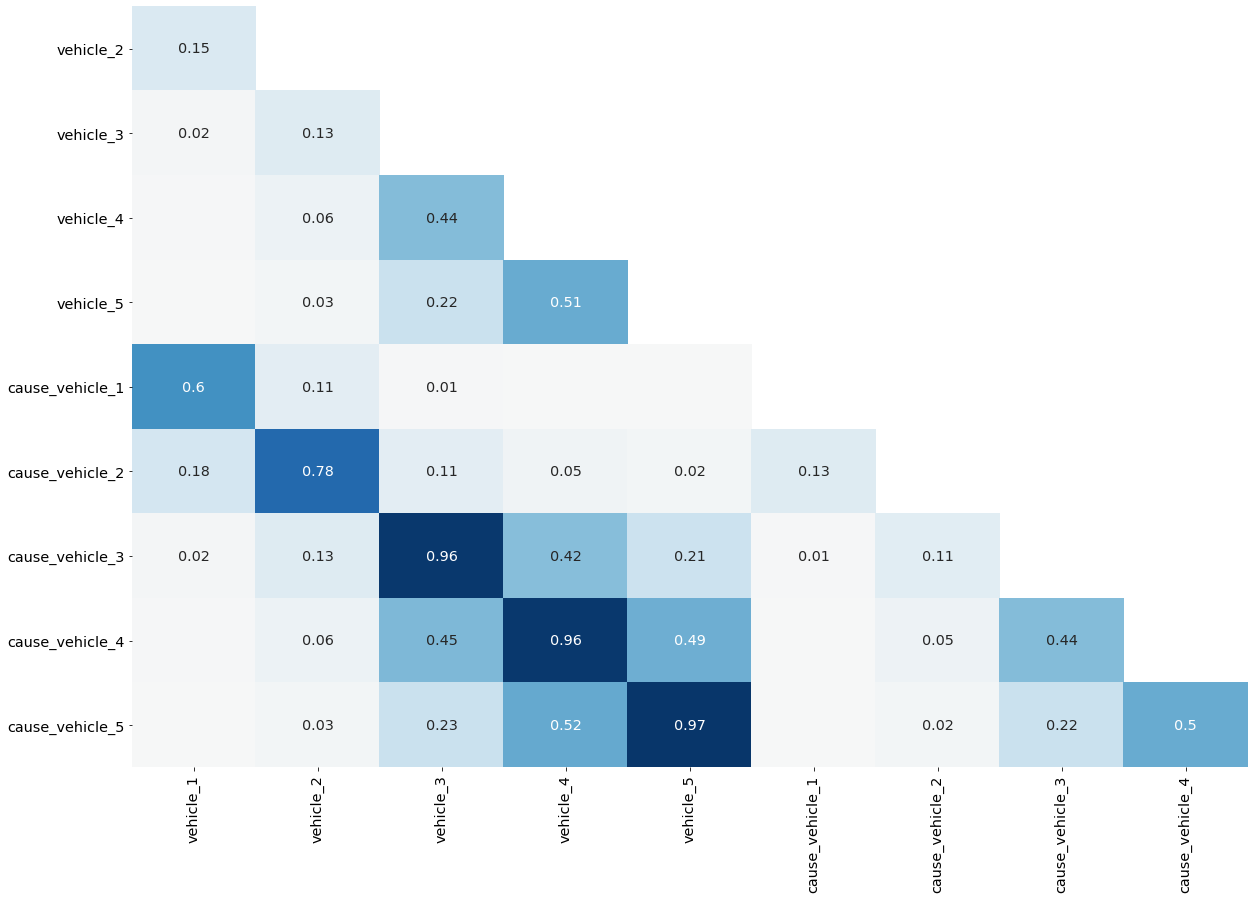

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_null_correlations(df):
    # create a correlation matrix only for columns with at least
    # one missing value
    cols_with_missing_vals = df.columns[df.isnull().sum() > 0]
    missing_corr = df[cols_with_missing_vals].isnull().corr()
    
    # create a mask to avoid repeated values and make
    # the plot easier to read
    missing_corr = missing_corr.iloc[1:, :-1]
    mask = np.triu(np.ones_like(missing_corr), k=1) # np.triu: Upper triangle of an array.
    
    # plot a heatmap of the values
    plt.figure(figsize=(20,14))
    ax = sns.heatmap(missing_corr, vmin=-1, vmax=1, cbar=False,
                     cmap='RdBu', mask=mask, annot=True)
    
    # format the text in the plot to make it easier to read
    for text in ax.texts:
        t = float(text.get_text())
        if -0.05 < t < 0.01:
            text.set_text('')
        else:
            text.set_text(round(t, 2))
        text.set_fontsize('x-large')
    plt.xticks(rotation=90, size='x-large')
    plt.yticks(rotation=0, size='x-large')

    plt.show()

vehicles_cols = [col for col in mvc.columns if 'vehicle' in col]

vehicles = mvc[vehicles_cols]

plot_null_correlations(vehicles)

### Analyzing Correlations in Missing Data.

Let's explore the variations in missing values from these five pairs of columns. We'll create a dataframe that counts, for each pair:

- The number of values where the vehicle is missing when the cause is not missing.


- The number of values where the cause is missing when the vehicle is not missing.


In [40]:
col_labels = ['v_number', 'vehicle_missing', 'cause_missing']

vc_null_data = []

for v in range(1,6):
    v_col = 'vehicle_{}'.format(v)
    c_col = 'cause_vehicle_{}'.format(v)
    
    v_null = (mvc[v_col].isnull() & mvc[c_col].notnull()).sum()
    c_null = (mvc[c_col].isnull() & mvc[v_col].notnull()).sum()
    
    vc_null_data.append([v, v_null, c_null])

    
# vc_null_data
# [[1, 204, 24], [2, 3793, 223], [3, 242, 24], [4, 50, 3], [5, 10, 0]]

vc_null_df = pd.DataFrame(vc_null_data, columns=col_labels)
vc_null_df

,v_number,vehicle_missing,cause_missing
0,1,204,24
1,2,3793,223
2,3,242,24
3,4,50,3
4,5,10,0


### Finding the Most Common Values Across Multiple Columns (columns `category or str`)

The analysis we did on the previous screen indicates that there are roughly 4,500 missing values across the 10 columns. The easiest option for handling these would be to drop the rows with missing values. This would mean losing almost 10% of the total data, which is something we ideally want to avoid.

**A better option is to impute the data, like we did earlier. Because the data in these columns is text data, we can't perform a numeric calculation to impute missing data like we did with the injuries and killed columns.**

**One common option when imputing is to use the most common value to fill in data**. Let's look at the common values across these columns and see if we can use that to make a decision.

We've previously used the `Series.value_counts()` method to find the most common values in a single column. In this case, we want to find the most common values across multiple columns. In order to do this, we first need to convert our dataframe of multiple columns into one single column, and then we can use Series.value_counts() to count the items.

### To convert a dataframe to a single column of values, we use the `DataFrame.stack()` method

Which stacks a dataframe object into a Series object. 

We'll start with a simple dataframe with three columns containing words:

In [41]:
cause_cols = [c for c in mvc.columns if "cause_" in c]
cause = mvc[cause_cols]
cause.head()

,cause_vehicle_1,cause_vehicle_2,cause_vehicle_3,cause_vehicle_4,cause_vehicle_5
0,Following Too Closely,Unspecified,NaN,NaN,NaN
1,Backing Unsafely,Unspecified,NaN,NaN,NaN
2,Following Too Closely,Unspecified,NaN,NaN,NaN
3,Glare,Passing Too Closely,NaN,NaN,NaN
4,Turning Improperly,Unspecified,NaN,NaN,NaN


Next, we'll stack the values into a single series object:

In [42]:
cause_1d = cause.stack()
cause_1d.head()

0  cause_vehicle_1    Following Too Closely
   cause_vehicle_2              Unspecified
1  cause_vehicle_1         Backing Unsafely
   cause_vehicle_2              Unspecified
2  cause_vehicle_1    Following Too Closely
dtype: object

You may notice that **the stacked version omits null values** - this is fine, as we're just interested in the most common non-null values.

Finally, we count the values in the series:

In [43]:
cause_counts = cause_1d.value_counts()
top10_causes = cause_counts.head(10)
top10_causes

Unspecified                       57481
Driver Inattention/Distraction    17650
Following Too Closely              6567
Failure to Yield Right-of-Way      4566
Passing or Lane Usage Improper     3260
Passing Too Closely                3045
Backing Unsafely                   3001
Other Vehicular                    2523
Unsafe Lane Changing               2372
Turning Improperly                 1590
dtype: int64

**The most common non-null value** for the cause columns is Unspecified, which presumably indicates that the officer reporting the collision was unable to determine the cause for that vehicle.

### Same technique to **identify the most common non-null value for the `vehicle` columns**.

In [44]:
v_cols = [c for c in mvc.columns if c.startswith("vehicle")]

vehicles = mvc[v_cols]
vehicles_1d = vehicles.stack()
vehicles_counts = vehicles_1d.value_counts()
top10_vehicles = vehicles_counts.head(10)
top10_vehicles

Sedan                                  33133
Station Wagon/Sport Utility Vehicle    26124
PASSENGER VEHICLE                      16026
SPORT UTILITY / STATION WAGON          12356
Taxi                                    3482
Pick-up Truck                           2373
TAXI                                    1892
Box Truck                               1659
Bike                                    1190
Bus                                     1162
dtype: int64

### Filling Unknown Values with a Placeholder

<!-- Let's look at the values analysis we completed on the previous screen: -->

In [45]:
print(top10_vehicles)

Sedan                                  33133
Station Wagon/Sport Utility Vehicle    26124
PASSENGER VEHICLE                      16026
SPORT UTILITY / STATION WAGON          12356
Taxi                                    3482
Pick-up Truck                           2373
TAXI                                    1892
Box Truck                               1659
Bike                                    1190
Bus                                     1162
dtype: int64


In [46]:
print(top10_causes)

Unspecified                       57481
Driver Inattention/Distraction    17650
Following Too Closely              6567
Failure to Yield Right-of-Way      4566
Passing or Lane Usage Improper     3260
Passing Too Closely                3045
Backing Unsafely                   3001
Other Vehicular                    2523
Unsafe Lane Changing               2372
Turning Improperly                 1590
dtype: int64


The top "cause" is an "Unspecified" marker. 

- This is useful instead of a null value as it makes the distinction between a value that is missing because there were only a certain number of vehicles in the collision versus one that the contributing cause for a particular vehicle is unknown.

The vehicles columns don't have an equivalent, but we can still use the same technique. Here's the logic we'll need to do for each pair of vehicle/cause columns:

1. For values where the vehicle is null and the cause is non-null, set the vehicle to Unspecified.

2. For values where the cause is null and the vehicle is not-null, set the cause to Unspecified.

We can use `Series.mask()` to replace the values, just like we did earlier in the lesson. Let's look at code to perform this for the vehicle_1 and vehicle_cause_1 columns:

    # create a mask for each column
    v_missing_mask = mvc['vehicle_1'].isnull() & mvc['cause_vehicle_1'].notnull()
    c_missing_mask = mvc['cause_vehicle_1'].isnull() & mvc['vehicle_1'].notnull()

    # replace the values matching the mask for each column
    mvc['vehicle_1'] =  mvc['vehicle_1'].mask(v_missing_mask, "Unspecified")
    mvc['cause_vehicle_1'] =  mvc['cause_vehicle_1'].mask(c_missing_mask, "Unspecified")

Now let's use a loop to fill in these values across all columns. We've created a helper function summarize_missing() which contains the logic we used earlier to count missing values across the pairs of columns. Below is a quick demonstration on how it works:

In [47]:
def summarize_missing():
    v_missing_data = []

    for v in range(1,6):
        v_col = 'vehicle_{}'.format(v)
        c_col = 'cause_vehicle_{}'.format(v)

        v_missing = (mvc[v_col].isnull() & mvc[c_col].notnull()).sum()
        c_missing = (mvc[c_col].isnull() & mvc[v_col].notnull()).sum()

        v_missing_data.append([v, v_missing, c_missing])

    col_labels = columns=["vehicle_number", "vehicle_missing", "cause_missing"]
    return pd.DataFrame(v_missing_data, columns=col_labels)

In [48]:
summarize_missing()

,vehicle_number,vehicle_missing,cause_missing
0,1,204,24
1,2,3793,223
2,3,242,24
3,4,50,3
4,5,10,0


In [49]:
def summarize_missing():
    v_missing_data = []

    for v in range(1,6):
        v_col = 'vehicle_{}'.format(v)
        c_col = 'cause_vehicle_{}'.format(v)
        
        # boolean mask for values where the vehicle column is null and the cause column is non-null.
        v_missing = (mvc[v_col].isnull() & mvc[c_col].notnull()).sum()
        
        # boolean mask for values where the cause column is null and the vehicle column is non-null.
        c_missing = (mvc[c_col].isnull() & mvc[v_col].notnull()).sum()

        v_missing_data.append([v, v_missing, c_missing])

    col_labels = columns=["vehicle_number", "vehicle_missing", "cause_missing"]
    return pd.DataFrame(v_missing_data, columns=col_labels)

summary_before = summarize_missing()

for v in range(1,6):
    v_col = 'vehicle_{}'.format(v)
    c_col = 'cause_vehicle_{}'.format(v)
    
    v_missing_mask = mvc[v_col].isnull() & mvc[c_col].notnull()
    c_missing_mask = mvc[c_col].isnull() & mvc[v_col].notnull()
    
    # first boolean mask to fill matching values from the vehicle column with the string `Unspecified`.
    mvc[v_col] = mvc[v_col].mask(v_missing_mask, "Unspecified")
    
    # second boolean mask to fill matching values from the cause column with the string `Unspecified`.
    mvc[c_col] = mvc[c_col].mask(c_missing_mask, "Unspecified")

#`summarize_missing()` for check if removed all matching values.
summary_after = summarize_missing()
summary_after

,vehicle_number,vehicle_missing,cause_missing
0,1,0,0
1,2,0,0
2,3,0,0
3,4,0,0
4,5,0,0


### Missing Data in the `location` columns.

- Null correlation plot for the last 10 columns.

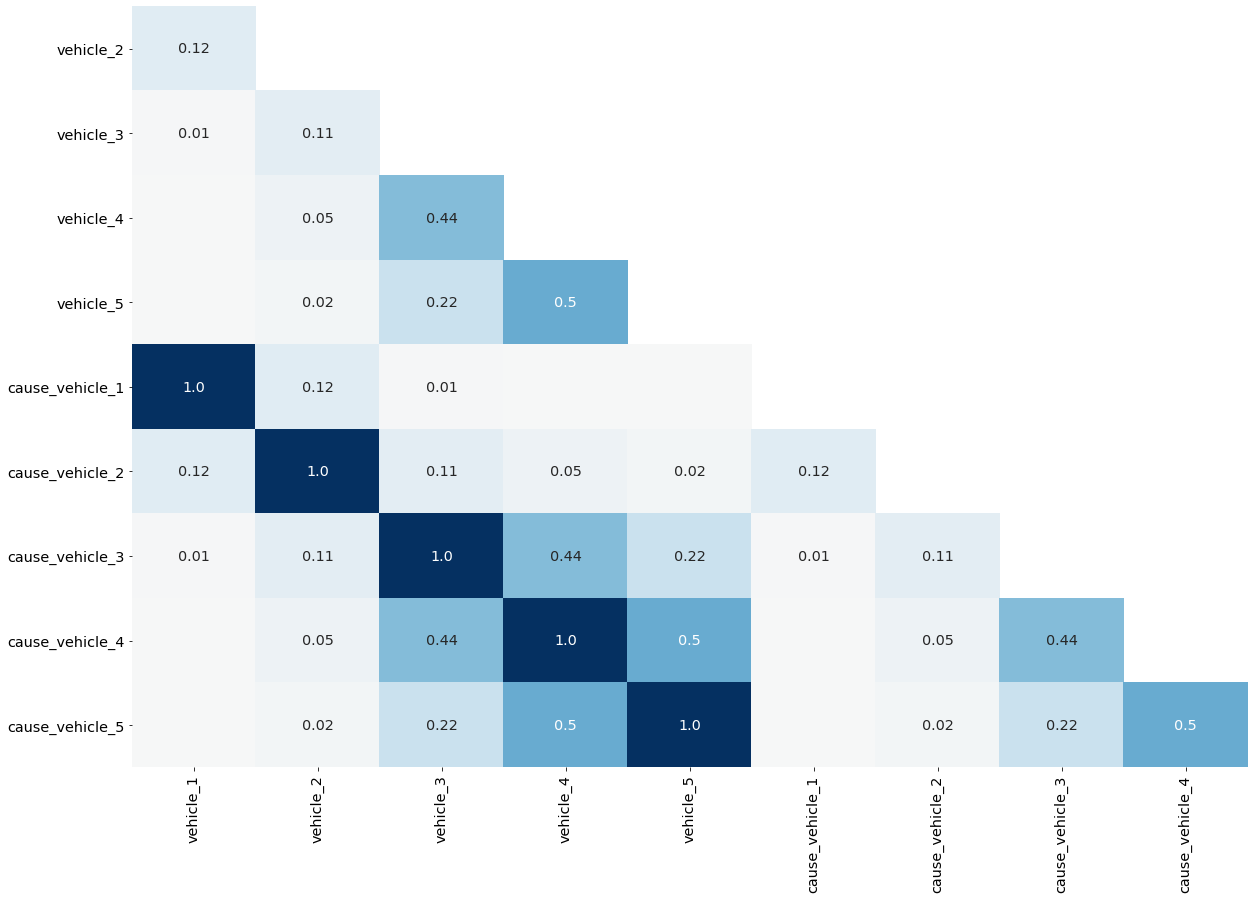

In [50]:
veh_cols = [c for c in mvc.columns if 'vehicle' in c]
plot_null_correlations(mvc[veh_cols])

The perfect correlation between each pair of vehicle/cause columns represented by 
1.0 in each square means that there is a perfect relationship between the five pairs of vehicle/cause columns.

Let's now turn our focus to the final set of columns that contain missing values — the columns that relate to the location of the accident. 

We'll start by looking at the first few rows to refamiliarize ourselves with the data:

In [51]:
loc_cols = ['borough', 'location', 'on_street', 'off_street', 'cross_street']
location_data = mvc[loc_cols]
location_data.head()

,borough,location,on_street,off_street,cross_street
0,MANHATTAN,"(40.742832, -74.00771)",WEST 15 STREET,NaN,10 AVENUE
1,BROOKLYN,"(40.623714, -73.99314)",16 AVENUE,NaN,62 STREET
2,NaN,"(40.591755, -73.9083)",BELT PARKWAY,NaN,NaN
3,QUEENS,"(40.73602, -73.87954)",GRAND AVENUE,NaN,VANLOON STREET
4,BRONX,"(40.884727, -73.89945)",NaN,208 WEST 238 STREET,NaN


Next, let's look the null values in each column:

In [52]:
location_data.isnull().sum()

borough         20646
location         3885
on_street       13961
off_street      44093
cross_street    29249
dtype: int64

These columns have a lot of missing values! 

All of these five columns represent the same thing — the location of the collision so we can potentially use the non-null values to impute some of the null values.

To see where we might be able to do this, let's look for correlations between the missing values:

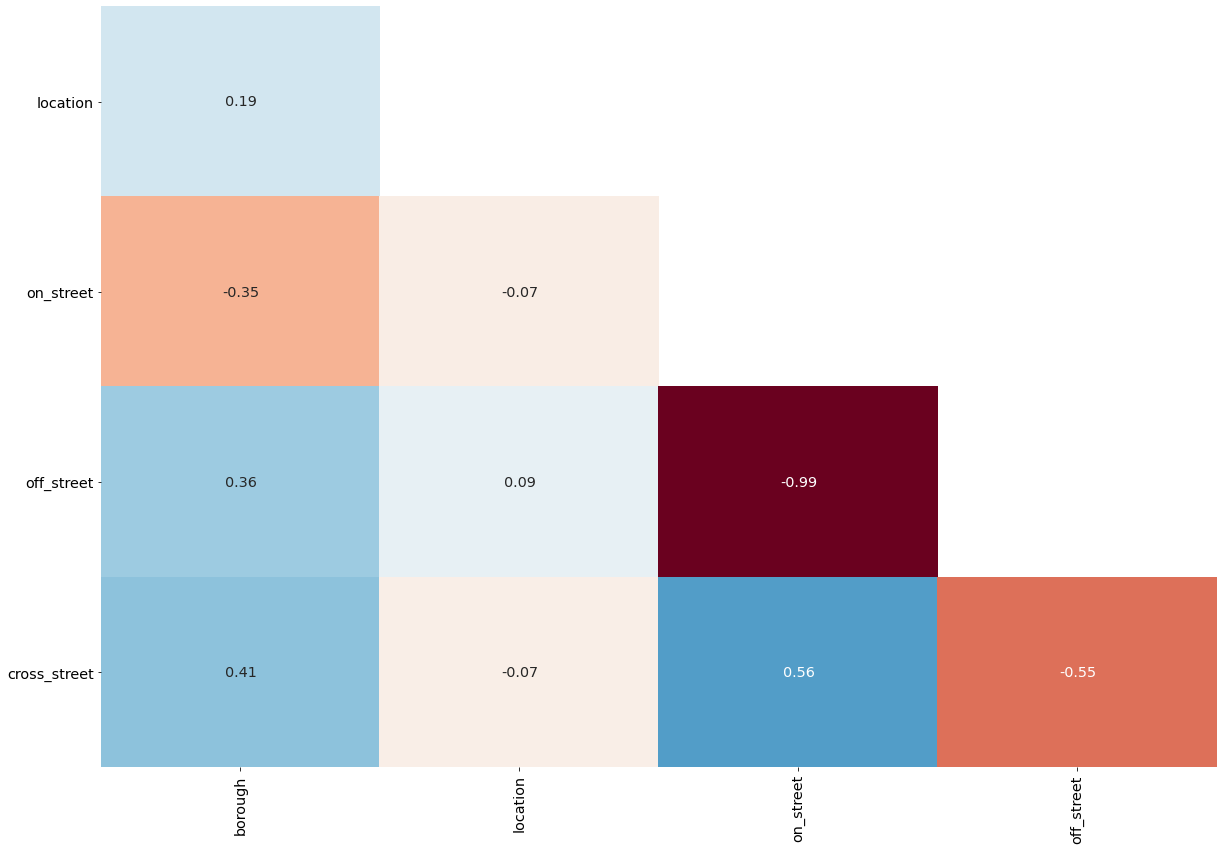

In [53]:
plot_null_correlations(location_data)

None of these columns have strong correlations except for `off_street` and `on_street` which have a near perfect negative correlation. That means for almost every row that has a null value in one column, the other has a non-null value and vice-versa.

The final way we'll look at the null values in these columns is to plot a null matrix, but we'll sort the data first. This will gather some of the null and non-null values together and make patterns more obvious:

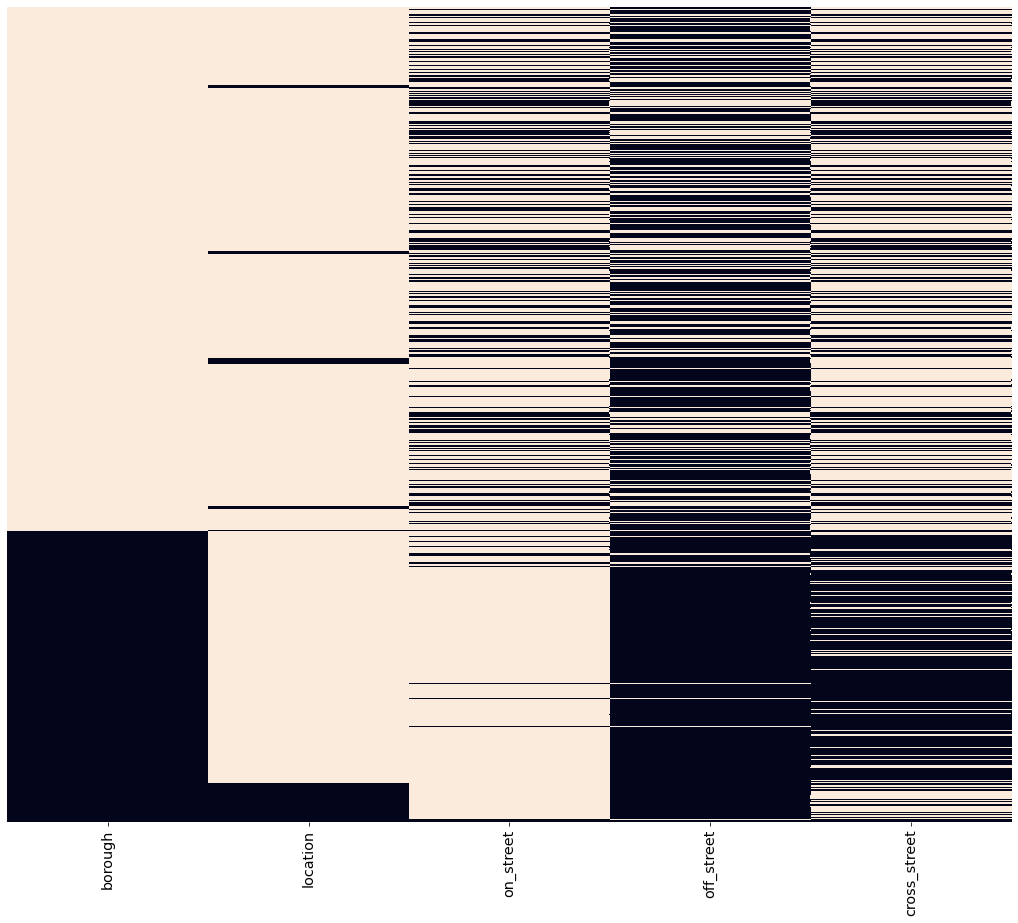

In [54]:
# remember: loc_cols = ['borough', 'location', 'on_street', 'off_street', 'cross_street']
sorted_location_data = location_data.sort_values(loc_cols)
plot_null_matrix(sorted_location_data)

Let's make some observations about the missing values across these columns:


- 1. About two-thirds of rows have non-null values for `borough`, but of those values that are missing, most have non-null values for `location` and one or more of the street name columns.


- 2. Less than one-tenth of rows have missing values in the `location` column, but most of these have non-null values in one or more of the street name columns.


- 3. Most rows have a non-null value for either `on_street` or `off_street`, and some also have a value for `cross_street`.


**Combined, this means that we will be able to impute a lot of the missing values by using the other columns in each row. To do this, we can use geolocation APIs that take either an address or location coordinates, and return information about that location.**


### Imputing Location Data

We prepared the supplemental data using the [GeoPy](https://geopy.readthedocs.io/en/latest/) package, which makes working with Geocoding APIs like the Google Maps API easier. Here's the strategy we used to prepare the supplemental data:

- For rows with `location` values but missing values in either `borough` or the street name columns, we used geocoding APIs to look up the location coordinates to find the missing data.

- For rows with values in the street name columns missing `borough` and/or `location` data, we used geocoding APIs to look up the address to find the missing data.


The supplemental data is in a CSV called `supplemental_data.csv`, let's read this into a pandas dataframe and familiarize ourself with the data:

In [55]:
sup_data = pd.read_csv('csv/supplemental_data.csv')
sup_data.head()

,unique_key,location,on_street,off_street,borough
0,3869058,NaN,NaN,NaN,NaN
1,3847947,NaN,NaN,NaN,NaN
2,3914294,NaN,BELT PARKWAY,NaN,BROOKLYN
3,3915069,NaN,NaN,NaN,NaN
4,3923123,NaN,NaN,NaN,NaN


The supplemental data has five columns from our original data set — the `unique_key` that identifies each collision, and four of the five location columns. The `cross_street` column is not included because the geocoding APIs we used don't include data on the nearest cross street to any single location.

Let's take a look at a null matrix for the supplemental data:

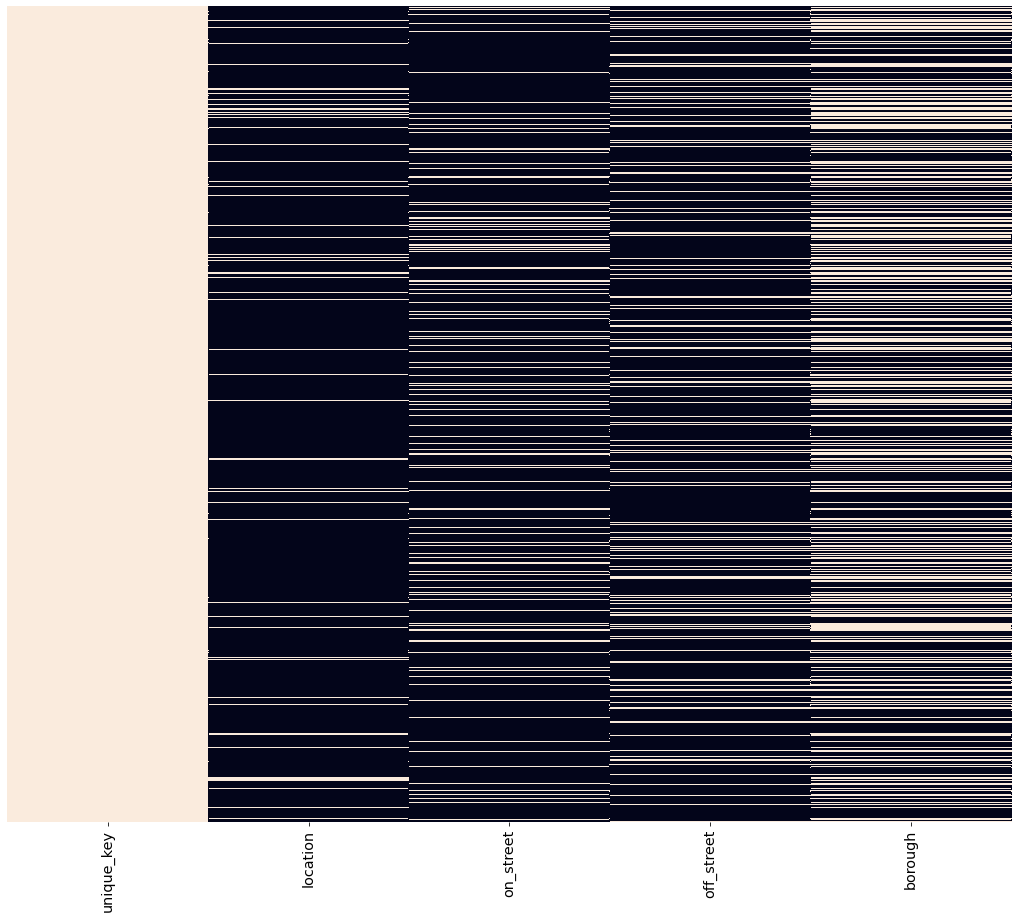

In [56]:
plot_null_matrix(sup_data)

Apart from the `unique_key` column, you'll notice that there are a lot more missing values than our main data set. 

This makes sense, as we didn't prepare supplemental data where the original data set had non-null values.

If the `unique_key` column in both the original and supplemental data has the same values in the same order, we'll be able to use `Series.mask()` to add our supplemental data to our original data. 

We can check this using the `Series.equals()` method testing if whether two objects contain the same elements:

In [57]:
mvc_keys = mvc['unique_key']
sup_keys = sup_data['unique_key']

is_equal = mvc_keys.equals(sup_keys)
print(is_equal)

True


We've verified the data, **to impute missing values**.

In [59]:
sup_data = pd.read_csv('csv/supplemental_data.csv')

location_cols = ['location', 'on_street', 'off_street', 'borough']

null_before = mvc[location_cols].isnull().sum()

for col in location_cols:
    mvc[col] = mvc[col].mask(mvc[col].isnull(), sup_data[col])

null_after = mvc[location_cols].isnull().sum()
null_after

location         77
on_street     13734
off_street    36131
borough         232
dtype: int64

We've imputed thousands of values to reduce the number of missing values across our data set. Let's look at a summary of the null values before and after our data cleaning:


In [60]:
last_mvc = mvc.isnull().sum()
last_mvc

unique_key                 0
date                       0
time                       0
borough                  232
location                  77
on_street              13734
cross_street           29249
off_street             36131
pedestrians_injured        0
cyclist_injured            0
motorist_injured           0
total_injured             21
pedestrians_killed         0
cyclist_killed             0
motorist_killed            0
total_killed               1
vehicle_1                151
vehicle_2               8469
vehicle_3              54110
vehicle_4              57108
vehicle_5              57671
cause_vehicle_1          151
cause_vehicle_2         8469
cause_vehicle_3        54110
cause_vehicle_4        57108
cause_vehicle_5        57671
dtype: int64

In [61]:
last_mvc_pct = last_mvc / mvc.shape[0] * 100
last_mvc_pct

unique_key              0.000000
date                    0.000000
time                    0.000000
borough                 0.400940
location                0.133071
on_street              23.734965
cross_street           50.547836
off_street             62.441242
pedestrians_injured     0.000000
cyclist_injured         0.000000
motorist_injured        0.000000
total_injured           0.036292
pedestrians_killed      0.000000
cyclist_killed          0.000000
motorist_killed         0.000000
total_killed            0.001728
vehicle_1               0.260957
vehicle_2              14.636043
vehicle_3              93.512374
vehicle_4              98.693488
vehicle_5              99.666459
cause_vehicle_1         0.260957
cause_vehicle_2        14.636043
cause_vehicle_3        93.512374
cause_vehicle_4        98.693488
cause_vehicle_5        99.666459
dtype: float64

In [62]:
null_df = pd.DataFrame({'null_counts': null_counts, 'null_pct %': null_counts_pct})

In [63]:
new_null_df = pd.DataFrame({'start NaN%': null_counts_pct,
                            'last  NaN%': last_mvc_pct,
                           'improvement':(null_counts_pct - last_mvc_pct).round(2) })
new_null_df

,start NaN%,last NaN%,improvement
unique_key,0.000000,0.000000,0.00
date,0.000000,0.000000,0.00
time,0.000000,0.000000,0.00
borough,35.680216,0.400940,35.28
location,6.714019,0.133071,6.58
on_street,24.127264,23.734965,0.39
cross_street,50.547836,50.547836,0.00
off_street,76.201092,62.441242,13.76
pedestrians_injured,0.000000,0.000000,0.00
cyclist_injured,0.000000,0.000000,0.00
